Question 1

In [1]:
# Importing libraries
import pandas as pd

In [2]:
# Reading the dataset
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(link, sep = "|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
 # Finding mean age per occupation
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
 # Function or filter for getting only males
def gender(var):
    if var == 'M':
        return True
    else:
        return False
    
# Filtering male only
users['male_only'] = users['gender'].apply(gender)

 # finding sum of male employees only
male_only = users.groupby('occupation')['male_only'].sum()
male_only

occupation
administrator     43
artist            15
doctor             7
educator          69
engineer          65
entertainment     16
executive         29
healthcare         5
homemaker          1
lawyer            10
librarian         22
marketing         16
none               5
other             69
programmer        60
retired           13
salesman           9
scientist         28
student          136
technician        26
writer            26
Name: male_only, dtype: int64

In [5]:
 # finding sum of all employees per occupation
totalemp = users.groupby('occupation').gender.count()
totalemp

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: gender, dtype: int64

In [6]:
# finfing male ratio per occupation
ratio = male_only/totalemp
ratioSorted = ratio.sort_values(ascending = False)
ratioSorted

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [7]:
 # finding minimum age per occupation
users.groupby('occupation').age.min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [8]:
# finding maximum age per occupation
users.groupby('occupation').age.max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [9]:
 # For each combination of occupation and sex, finding the mean age 
users.groupby([ 'occupation' , 'gender' ])[ 'age' ].mean ()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [17]:
# finding total no.of employees in each occupatio per gender
total_by_gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# finding total no.of people per occupation
totalemp = users.groupby(['occupation']).count()

# finding the percentage of employees per gender
percentage_by_gender = total_by_gender.div(totalemp, level = "occupation") * 100
percentage_by_gender.loc[:, 'gender']


occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

Question 2

In [10]:
# Importing libraries
import pandas as pd
import numpy as np

In [17]:
# Reading the dataset
link = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(link, sep = ",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [18]:
# printing only the goal column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [23]:
# teams participated 
euro12.Team.nunique()

16

In [20]:
# total n0.of columns
len(euro12.columns)

35

In [21]:
# creating a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [24]:
# sorting teams by red cards
redcards_sorted = discipline.sort_values(by='Red Cards')
redcards_sorted

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
7,Italy,16,0
8,Netherlands,5,0
10,Portugal,12,0
12,Russia,6,0


In [25]:
# sorting teams by yellow cards
yellowcards_sorted = discipline.sort_values(by='Yellow Cards')
yellowcards_sorted

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
11,Republic of Ireland,6,1
12,Russia,6,0
1,Czech Republic,7,0
9,Poland,7,1


In [26]:
# finding mean of yellow cards per team
discipline['Yellow Cards'].mean()

7.4375

In [61]:
more_than_six = euro12[euro12.Goals > 6]
more_than_six

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [62]:
# teams starting with letter'g'
starting_g = euro12[euro12.Team.str.startswith("G")]
starting_g

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [63]:
# selecting first 7 coloumns
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [64]:
# select all coloumns except last three
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [65]:
# shooting accuracy of england italy and russia
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3

In [27]:
# Importing libraries
import random
import pandas as pd
import numpy as np

In [31]:
# first series of data
series_1 = pd.Series(np.random.randint(1,5,100))
series_1

0     3
1     4
2     2
3     4
4     4
     ..
95    2
96    2
97    3
98    4
99    2
Length: 100, dtype: int32

In [32]:
# second series of data
series_2 = pd.Series(np.random.randint(1,4,100))
series_2

0     3
1     1
2     1
3     3
4     1
     ..
95    2
96    3
97    2
98    3
99    1
Length: 100, dtype: int32

In [34]:
# third series of data
series_3 = pd.Series(np.random.randint(10000,30000,100))
series_3

0     25646
1     21926
2     22724
3     19294
4     12316
      ...  
95    16081
96    15473
97    10502
98    16650
99    27624
Length: 100, dtype: int32

In [36]:
# creating a new data frame
allseries = pd.concat([series_1, series_2, series_3], axis = 1)
allseries

,0,1,2
0,3,3,25646
1,4,1,21926
2,2,1,22724
3,4,3,19294
4,4,1,12316
...,...,...,...
95,2,2,16081
96,2,3,15473
97,3,2,10502
98,4,3,16650


In [37]:
# changing the name of columns
allseries.columns = ['bedrs','bathrs','price_sqr_meter']
allseries

,bedrs,bathrs,price_sqr_meter
0,3,3,25646
1,4,1,21926
2,2,1,22724
3,4,3,19294
4,4,1,12316
...,...,...,...
95,2,2,16081
96,2,3,15473
97,3,2,10502
98,4,3,16650


In [45]:
# creating one column dataframe
bigcolumn = pd.concat([series_1, series_2, series_3], axis = 0)
bigcolumn

0         3
1         4
2         2
3         4
4         4
      ...  
95    16081
96    15473
97    10502
98    16650
99    27624
Length: 300, dtype: int32

In [42]:
# finding the index
len(bigcolumn)

100

In [46]:
# changing the index to 300
bigcolumn = range(0, 300)
bigcolumn

range(0, 300)

Question 4

In [1]:
# importing libraries
import pandas as pd
import datetime

In [2]:
# reading the dataset and appling proper date time
date = pd.read_csv('wind.txt',sep="\s+",parse_dates=[[0,1,2]])
date.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [3]:
# Function for fixing the year 2061
def fixYears(var):
    if var.year > 1979:
        year=var.year-100
    else:
        year = var.year
    return datetime.date(year,var.month,var.day)

date['Yr_Mo_Dy'] = date['Yr_Mo_Dy'].apply(fixYears)
date.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [4]:
# changing the index
date['Yr_Mo_Dy']=pd.to_datetime(date['Yr_Mo_Dy'])
date = date.set_index('Yr_Mo_Dy')
date.index.astype("datetime64[ns]")
date.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [5]:
# finding the total null entries
date.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [7]:
# finding the number of total non-missing entries
date.shape[0]-date.isnull().sum() 

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [8]:
# finding mean wind speeds
date.mean().mean()

10.227982360836924

In [10]:
# creating dataframe loc_stats for calculations
loc_stats = pd.DataFrame()
loc_stats['min']=date.min()
loc_stats['max']=date.max()
loc_stats['mean']=date.mean()
loc_stats['std']=date.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [11]:
# creating dataframe day_stats for calculations
day_stats=pd.DataFrame()
day_stats['min']=date.min(axis=1)
day_stats['max']=date.max(axis=1)
day_stats['mean']=date.mean(axis=1)
day_stats['std']=date.std(axis=1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [12]:
# average wind speed for january
data_jan = date[date.index.month == 1]
data_jan.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [14]:
# downsampled for yearly frequency
date.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [15]:
# downsampled for monthly frequency
date.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [16]:
# downsampled for weekly frequency
date.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [18]:
# changing the date of first week and performing calculations
data = date[date.index < pd.to_datetime('1962-01-01')]
data.resample('W').mean()
data.resample('W').min()
data.resample('W').max()
data.resample('W').std()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-08,2.631321,3.949525,1.604761,1.810743,3.251660,2.059546,1.872222,3.098404,1.722255,1.704941,4.349139,1.773062
1961-01-15,3.555392,3.148945,5.034959,3.549559,3.471726,3.251039,4.709309,3.936894,3.500975,4.084293,5.552215,4.692355
1961-01-22,5.337402,3.837785,5.086229,6.245541,3.612875,3.453432,5.166300,3.164990,4.169112,4.783952,3.626584,4.237239
1961-01-29,4.619061,5.170224,4.665843,4.301325,4.858116,3.749415,4.508449,4.436222,4.902057,3.713368,5.210726,3.874721
1961-02-05,5.251408,5.187395,3.975166,2.709106,2.334619,2.397066,2.423454,4.081158,2.802490,2.839501,4.210858,4.336104
1961-02-12,3.587677,3.608373,3.290303,2.262056,5.571108,3.048976,2.974059,3.022753,2.914760,1.746749,4.063753,1.828705
1961-02-19,5.064609,3.575012,4.196621,4.311569,2.321716,3.024078,4.958631,2.283444,2.560591,2.531361,5.910938,4.685377
1961-02-26,7.020716,5.147348,5.578470,4.482075,6.480712,5.029874,6.037916,4.869668,4.705163,4.920064,5.091162,6.182283


Question 5

In [6]:
# importing libraries
import pandas as pd

In [7]:
# reading the data
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(link, sep = "\t")
chipo[0:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [8]:
# no.of observations
len(chipo)

4622

In [9]:
# no.of columns
len(chipo.columns)

5

In [10]:
# printing the columns
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [11]:
# properties of index
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [12]:
# most ordered item
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).index[0]

'Chicken Bowl'

In [13]:
# ndetails of most ordered item
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [14]:
# most ordered item in choice_description
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

In [15]:
# total noof ordered items
chipo.quantity.sum()

4972

In [18]:
# function to convert item price into float
try:                                                 
    convertToFloat = lambda x: float(x[1:-1])
    chipo.item_price = chipo.item_price.apply(convertToFloat)    
except:TypeError  

In [19]:
# checking data type of item_price
chipo.dtypes.item_price

dtype('float64')

In [20]:
# finding the total revanue
chipo['revenuebyItem'] = chipo['quantity']*chipo.item_price
total_reveneue = chipo.revenuebyItem.sum()
total_reveneue

39237.02

In [22]:
# finding total no.of irders
order_total = chipo.order_id.nunique()
order_total

1834

In [23]:
# finding the average revanue 
avg_revanue = chipo.groupby(by=['order_id']).sum().mean()['revenuebyItem']
avg_revanue

21.394231188658654

In [24]:
# unique no.of items sold
chipo.item_name.nunique()

50

Question 6

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as cht

In [3]:
# loading the data
mar_and_div = pd.read_csv('us-marriages-divorces-1867-2014.csv')
mar_and_div.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


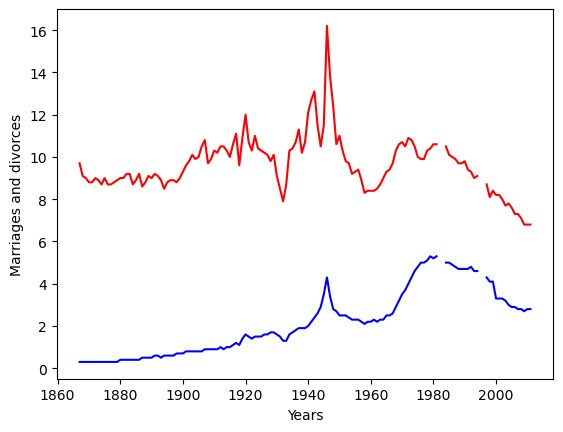

In [4]:
#plotting the chart for no.of marriages and divorces per capita
year = mar_and_div.Year.values
marriages = mar_and_div.Marriages_per_1000.values
divorces = mar_and_div.Divorces_per_1000.values
cht.plot(year, marriages , color="red",)
cht.plot(year, divorces , color="blue",)
cht.ylabel('Marriages and divorces')
cht.xlabel("Years")
cht.show()

Question 7

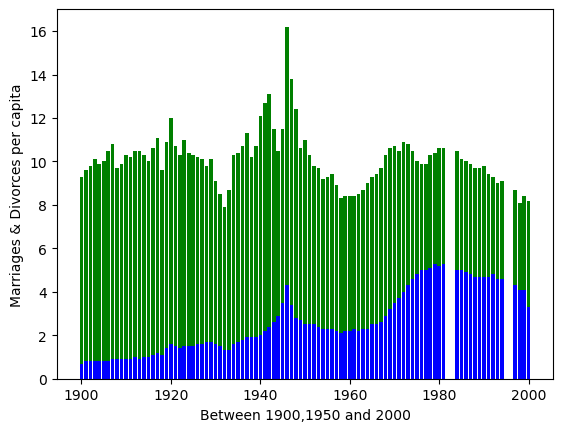

In [10]:
#plotting the chart for comparing the number of marriages and divorces
year_1900 = mar_and_div.Year>=1900
year_2000 = mar_and_div.Year<=2000
data_1900to2000 = mar_and_div[year_1900 & year_2000]
plt.bar(data_1900to2000['Year'],data_1900to2000['Marriages_per_1000'],color="Green")
plt.bar(data_1900to2000['Year'],data_1900to2000['Divorces_per_1000'],color="Blue")
plt.xlabel("Between 1900,1950 and 2000")
plt.ylabel("Marriages & Divorces per capita")
plt.show()

Question 8

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as cht

In [13]:
# reading the data
kill = pd.read_csv('actor_kill_counts.csv')
kill.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


In [16]:
# sorting the data
kill = kill.sort_values('Count', ascending = True)
actor_names = kill['Actor'].values
kill_num = kill['Count'].values

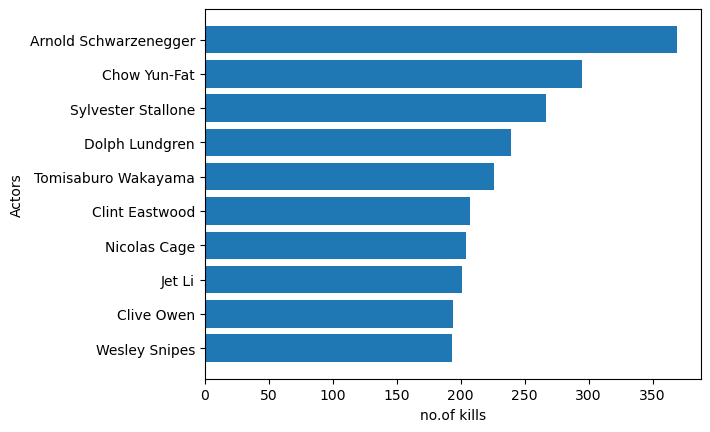

In [17]:
# plotting the chart for comparing the deadliest actors
cht.barh(actor_names, kill_num)
cht.ylabel("Actors")
cht.xlabel("no.of kills")
cht.show()

Question 9

In [19]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as cht

In [20]:
emp = pd.read_csv('roman-emperor-reigns.csv')
emp.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [26]:
# assigning the legend's values
assasinations = emp.where(emp.Cause_of_Death=="Assassinated").Cause_of_Death.count()
other_deaths = emp.Cause_of_Death.count()-assasinations

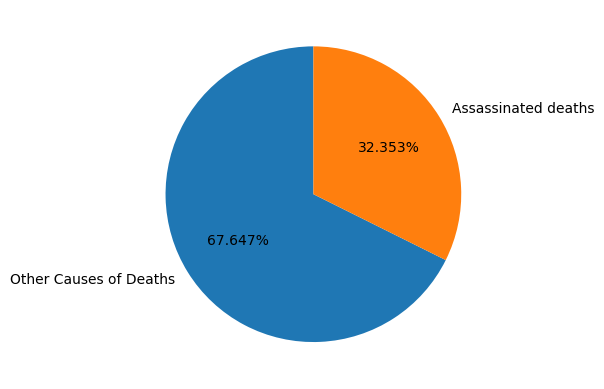

In [30]:
# plotting the chart for causes of deaths
label=["Other Causes of Deaths","Assassinated deaths"]
cht.pie([other_deaths,assasinations],labels=label,startangle = 90, autopct='%.3f%%')
cht.show()

In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as cht

In [6]:
# loading the data
arc = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arc.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


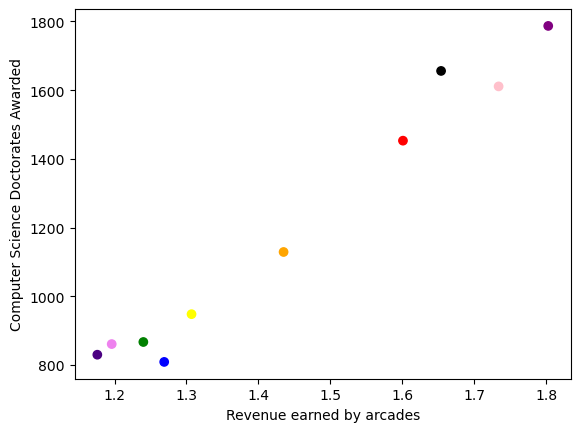

In [8]:
# plotting the chart to show relation ship b/w arcade revanue and computer science phD awarded
year = arc.Year
arcade_rev = arc['Total Arcade Revenue (billions)']
phd_rev = arc['Computer Science Doctorates Awarded (US)']
colors = ["violet","indigo","blue","green","yellow","orange","Red","black","purple","Pink"]
cht.scatter(arcade_rev, phd_rev, color=colors)
cht.xlabel("Revenue earned by arcades")
cht.ylabel("Computer Science Doctorates Awarded")
cht.show()

Thank You.